# Point source plotting basics
In 3ML, we distinguish between **data** and **model** plotting. Data plots contian real data points and the over-plotted model is (sometimes) folded through an instrument response. Therefore, the x-axis is not always in the same *units* across instruments if there is energy dispersion. 

However, all instuments see the same model and a multi-wavelength fit can be viewed in model space without complication. 3ML uses one interface to plot both MLE and Bayesian fitted models. To demonstrate we will use toy data simulated from a powerlaw and two gaussians for MLE fits and an exponentially cutoff power law with one gaussian for Bayesian fits.

First we load the analysis results:


In [1]:
%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

from threeML import *
from threeML.io.package_data import get_path_of_data_file

Configuration read from /Users/jburgess/.threeML/threeML_config.yml


In [2]:
mle1 = load_analysis_results(get_path_of_data_file('datasets/toy_xy_mle1.fits'))
bayes1 = load_analysis_results(get_path_of_data_file('datasets/toy_xy_bayes2.fits'))

## Plotting a single analysis result

The easiest way to plot is to call **plot_point_source_spectra**. By default, it plots in photon space with a range of 10-40000 keV evaluated at 100 logrithmic points:

<IPython.core.display.Javascript object>


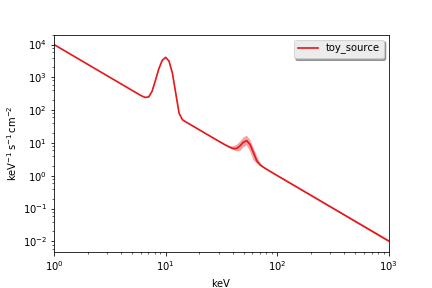

In [3]:
_ = plot_point_source_spectra(mle1,ene_min=1,ene_max=1E3)

### Flux and energy units
We use astropy units to specify both the flux and energy units. 
* The plotting routine understands photon, energy ($F_{\nu}$) and $\nu F_{
\nu}$ flux units;

* energy units can be energy, frequency, or wavelength

* a custom range can be applied.

#### changing flux units


<IPython.core.display.Javascript object>


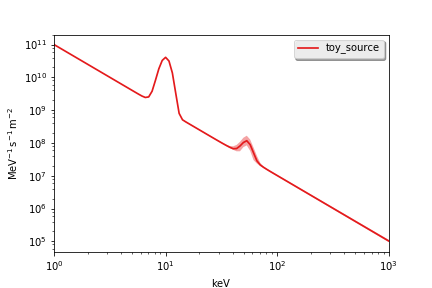

<IPython.core.display.Javascript object>


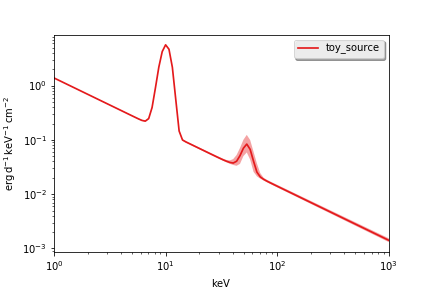

<IPython.core.display.Javascript object>


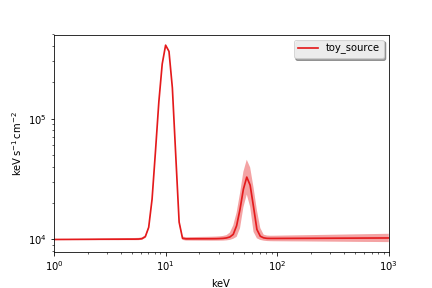

In [4]:
_ = plot_point_source_spectra(mle1,ene_min=1,ene_max=1E3,flux_unit='1/(m2 s MeV)')
_ = plot_point_source_spectra(mle1,ene_min=1,ene_max=1E3,flux_unit='erg/(cm2 day keV)')
_ = plot_point_source_spectra(mle1,ene_min=1,ene_max=1E3,flux_unit='keV2/(cm2 s keV)')

#### changing energy units

<IPython.core.display.Javascript object>


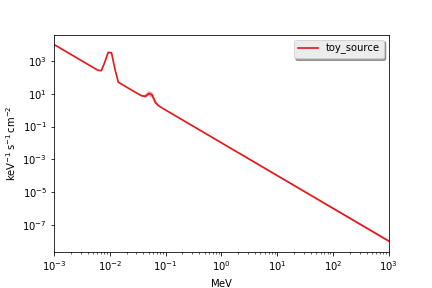

<IPython.core.display.Javascript object>


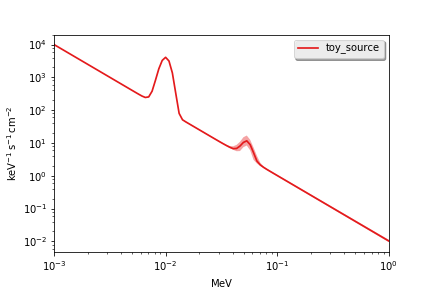

<IPython.core.display.Javascript object>


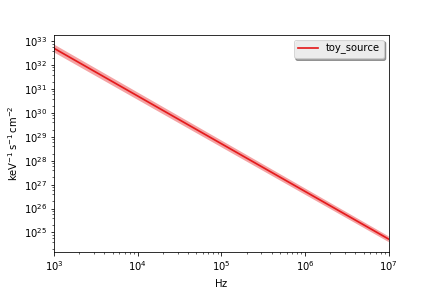

<IPython.core.display.Javascript object>


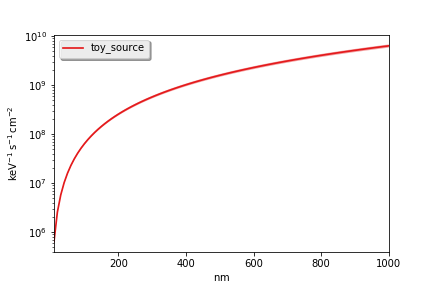

In [5]:
_ = plot_point_source_spectra(mle1,
                              ene_min=.001,
                              ene_max=1E3,
                              energy_unit='MeV')

# energy ranges can also be specified in units
_ = plot_point_source_spectra(mle1,
                              ene_min=1*astropy_units.keV,
                              ene_max=1*astropy_units.MeV)

_ = plot_point_source_spectra(mle1,
                              ene_min=1E3*astropy_units.Hz,
                              ene_max=1E7*astropy_units.Hz)

_ = plot_point_source_spectra(mle1,
                              ene_min=1E1*astropy_units.nm,
                              ene_max=1E3*astropy_units.nm,
                              xscale='linear') # plotting with a linear scale


### Plotting components

Sometimes it is interesting to see the components in a composite model. We can specify the **use_components** switch. Here we will use *Bayesian* results. Note that all features work with MLE of Bayesian results.

<IPython.core.display.Javascript object>


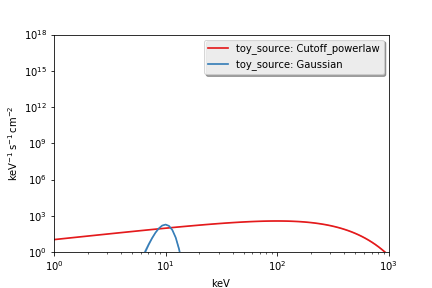

In [6]:
_ = plot_point_source_spectra(bayes1,
                              ene_min=1,
                              ene_max=1E3,
                              use_components=True
                             )

_=plt.ylim(bottom=1)

Notice that the duplicated components have the subscripts *n1* and *n2*. If we want to specify which components to plot, we must use these subscripts.

<IPython.core.display.Javascript object>


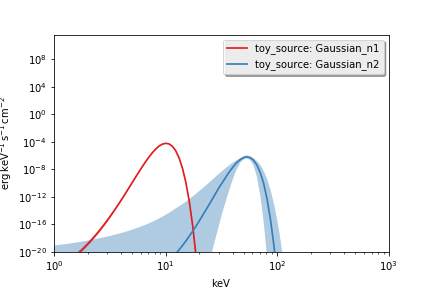

In [7]:
_ = plot_point_source_spectra(mle1,
                              flux_unit='erg/(cm2 s keV)',
                              ene_min=1,
                              ene_max=1E3,
                              use_components=True,
                              components_to_use=['Gaussian_n1','Gaussian_n2'])

_=plt.ylim(bottom=1E-20)

If we want to see the total model with the components, just add *total* to the components list.

Additionally, we can change the confidence interval for the contours from the default of 1$\sigma$ (0.68) to 2$\sigma$ (0.95).

<IPython.core.display.Javascript object>


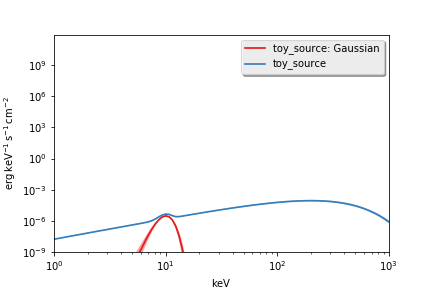

In [8]:
_ = plot_point_source_spectra(bayes1,
                              flux_unit='erg/(cm2 s keV)',
                              ene_min=1,
                              ene_max=1E3,
                              use_components=True,
                              components_to_use=['total','Gaussian'],
                              confidence_level=0.95)
                                


_=plt.ylim(bottom=1E-9)

<IPython.core.display.Javascript object>


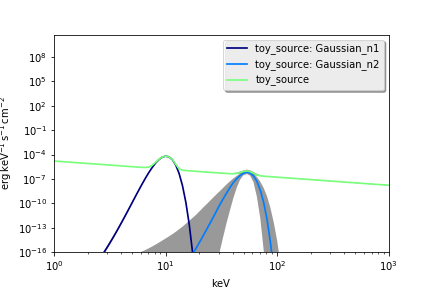

In [9]:
_ = plot_point_source_spectra(mle1,
                              flux_unit='erg/(cm2 s keV)',
                              ene_min=1,
                              ene_max=1E3,
                              use_components=True,
                              fit_cmap='jet', # specify a color map
                              contour_colors='k', # specify a color for all contours
                              components_to_use=['total','Gaussian_n2','Gaussian_n1'])
                                


_=plt.ylim(bottom=1E-16)

### Additional features
Explore the docstring to see all the available options. Default configurations can be altered in the 3ML config file.


* Use asymmetric errors and alter the default color map

<IPython.core.display.Javascript object>


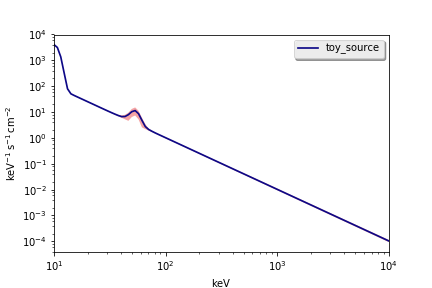

In [10]:
threeML_config['model plot']['point source plot']['fit cmap'] = 'plasma'
_ = plot_point_source_spectra(mle1, equal_tailed=False)

* turn of contours and the legend and increase the number of points plotted

<IPython.core.display.Javascript object>


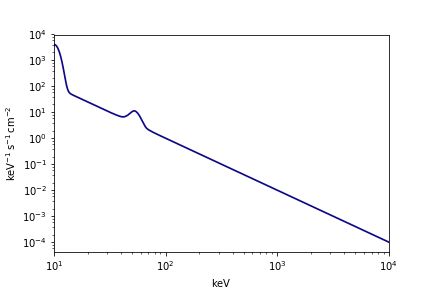

In [11]:
_ = plot_point_source_spectra(mle1, show_legend=False, show_contours=False, num_ene=500)

* colors or color maps can be specfied

<IPython.core.display.Javascript object>


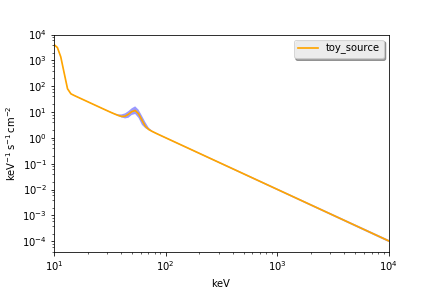

In [12]:
_ = plot_point_source_spectra(mle1, fit_colors='orange', contour_colors='blue')

Further modifications to plotting style, legend style, etc. can be modified either in the 3ML configuration:

In [13]:
threeML_config['model plot']['point source plot']

{'bayes cmap': 'Set1',
 'contour cmap': 'Set1',
 'contour style': {'alpha': 0.4},
 'fit cmap': 'plasma',
 'legend style': {'fancybox': True, 'loc': 'best', 'shadow': True},
 'plot style': {'linestyle': '-', 'linewidth': 1.7}}

or by directly passing dictionary arguments to the the plot command. Examine the docstring for more details!

## Plotting multiple results

Any number of results can be plotted together. Simply provide them as arguments. You can mix and match MLE and Bayesian results as well as plotting their components.

<IPython.core.display.Javascript object>


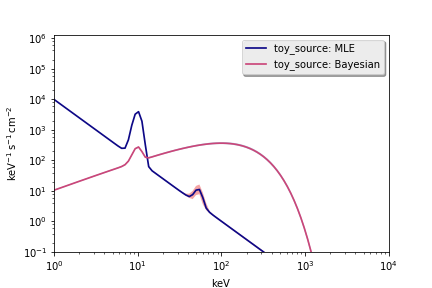

In [14]:
_ = plot_point_source_spectra(mle1, bayes1,ene_min=1)

_=plt.ylim(bottom=1E-1)

Specify particular colors for each analysis and broaden the contours

<IPython.core.display.Javascript object>


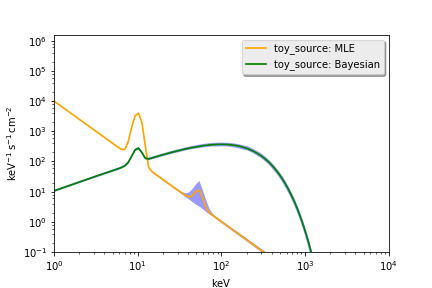

In [15]:
_ = plot_point_source_spectra(mle1,
                              bayes1,
                              ene_min=1.,
                              confidence_level=.95,
                              equal_tailed=False,
                              fit_colors=['orange','green'],
                              contour_colors='blue')
_ =plt.ylim(bottom=1E-1)

As with single results, we can choose to plot the components for all the sources.

<IPython.core.display.Javascript object>


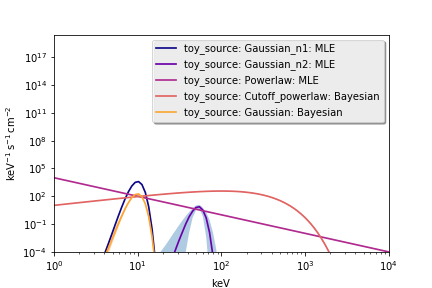

In [16]:
_ = plot_point_source_spectra(mle1,
                              bayes1,
                              ene_min=1.,
                             use_components=True)
_=plt.ylim(bottom=1E-4)